Lakukan preprocessing dan visualisasi pada data diabetes dengan ketentuan :




1. Imputasi missing value dengan mean, median, dan modus

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [7]:
# Imputasi kolom 'Age' dengan median
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,0
Outcome,0


In [13]:
# Imputasi kolom 'DiabetesPedigreeFunction' dengan mode
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].fillna(df['DiabetesPedigreeFunction'].mode())
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [14]:
# Imputasi kolom 'BMI' dengan mean
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [15]:
# Imputasi kolom 'Insulin' dengan median
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [18]:
# Imputasi kolom 'SkinThickness' dengan mode
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mode())
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [19]:
# Imputasi kolom 'BloodPressure' dengan mean
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [20]:
# Imputasi kolom 'Glucose' dengan median
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df.isnull().sum()

,0
Pregnancies,77
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [21]:
# Imputasi kolom 'Pregnancies' dengan mean
df['Pregnancies'] = df['Pregnancies'].fillna(df['Pregnancies'].mean())
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Dengan fungsi diatas kita dapat  melakukan imputasi missing value dengan mean, median, dan modus. Selain itu kita juga dapat menggunakan kode yang lainnya, yang lebih cepat dan efisien seperti kode di bawah ini

In [34]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # Perlu diimpor sebelum IterativeImputer
from sklearn.impute import IterativeImputer

# Load dataset
diabetes = pd.read_csv('diabetes.csv')

# Membuat salinan dataset
diabetes_copy = diabetes.copy()

# Membuat imputasi menggunakan IterativeImputer
iterative_imputer = IterativeImputer(
    random_state=69,   # random_state untuk konsistensi hasil
    max_iter=10,       # jumlah iterasi
    tol=1e-3           # toleransi untuk konvergensi
)

IterativelyImputed = iterative_imputer.fit_transform(diabetes)
diabetes = pd.DataFrame(IterativelyImputed, columns=diabetes.columns).round()



In [35]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


2. Cek korelasi antar variabel dengan heatmap


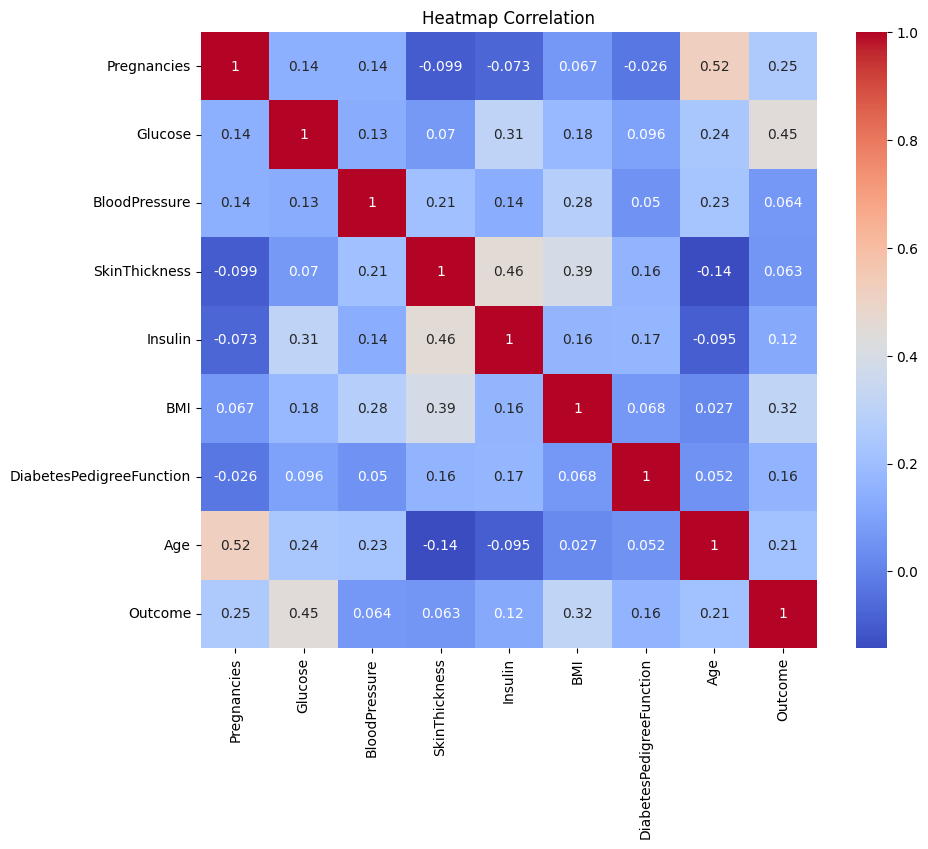

In [43]:
data = pd.read_csv('diabetes.csv')

corr_matrix = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', square = True)
plt.title('Heatmap Correlation')
plt.show()

3. Lakukan imbalance handling dengan undersampling

In [79]:
# Load dataset
diabetes = pd.read_csv('diabetes.csv')

# Menampilkan distribusi kelas sebelum undersampling
print("Distribusi kelas sebelum undersampling:")
print(diabetes['Outcome'].value_counts())

# Memisahkan fitur (X) dan target (y)
X = diabetes.drop('Outcome', axis=1)  # Semua kolom kecuali 'Outcome'
y = diabetes['Outcome']  # Kolom target 'Outcome'

# Melakukan undersampling pada data
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Menggabungkan kembali fitur dan target hasil undersampling
diabetes_undersampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Outcome'])], axis=1)

# Menampilkan distribusi kelas setelah undersampling
print("\nDistribusi kelas setelah undersampling:")
print(diabetes_undersampled['Outcome'].value_counts())

# Simpan dataset hasil undersampling ke file CSV
diabetes_undersampled.to_csv('diabetes_undersampled.csv', index=False)

# Menampilkan informasi tentang dataset setelah undersampling
print("\nInformasi dataset setelah undersampling:")
diabetes_undersampled.info()

Distribusi kelas sebelum undersampling:
Outcome
0    500
1    268
Name: count, dtype: int64

Distribusi kelas setelah undersampling:
Outcome
0    268
1    268
Name: count, dtype: int64

Informasi dataset setelah undersampling:
<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 556 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               481 non-null    float64
 1   Glucose                   447 non-null    float64
 2   BloodPressure             422 non-null    float64
 3   SkinThickness             507 non-null    float64
 4   Insulin                   402 non-null    float64
 5   BMI                       375 non-null    float64
 6   DiabetesPedigreeFunction  480 non-null    float64
 7   Age                       436 non-null    float64
 8   Outcome                   536 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 41.9 KB


4. Lakukan scaling dengan robust scaler dan minmax

In [80]:
# Robust Scaler
robust_scaler = RobustScaler()
data_robust = robust_scaler.fit_transform(diabetes_undersampled.drop('Outcome', axis = 1))

data_robust_scaled = pd.DataFrame(data_robust, columns=diabetes_undersampled.drop('Outcome', axis = 1).columns)
data_robust_scaled['Outcome'] = diabetes_undersampled['Outcome']

# Hapus Nilai NaN Jika Ada
data_robust_scaled = data_robust_scaled.dropna()

print("\nData Diabetes Yang Telah Di-Scaling Dengan Robust Scaler : ")
print(data_robust_scaled.head())

# MinMax Scaler
minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(diabetes_undersampled.drop('Outcome', axis = 1))

data_minmax_scaled = pd.DataFrame(data_minmax, columns=diabetes_undersampled.drop('Outcome', axis = 1).columns)
data_minmax_scaled['Outcome'] = diabetes_undersampled['Outcome']

# Hapus Nilai NaN Jika Ada
data_minmax_scaled = data_minmax_scaled.dropna()

print("\nData Diabetes Yang Telah Di-Scaling Dengan MinMax Scaler : ")
print(data_minmax_scaled.head())



Data Diabetes Yang Telah Di-Scaling Dengan Robust Scaler : 
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
2           0.0 -0.227273         -0.875        0.21875  0.207692 -0.387879   
9           0.0  0.204545         -0.500       -0.75000 -0.130769 -1.163636   
11          0.0 -0.500000          0.500       -0.40625  0.361538 -1.624242   
13         -0.6 -0.477273         -0.125        0.06250  0.253846 -0.230303   
26         -0.2  0.022727         -0.125        0.09375 -0.130769  0.496970   

    DiabetesPedigreeFunction     Age  Outcome  
2                   0.123937 -0.5625      1.0  
9                  -0.157959 -0.5625      1.0  
11                 -0.230863 -0.0625      1.0  
13                  0.529769 -0.6250      1.0  
26                 -0.094775 -0.2500      1.0  

Data Diabetes Yang Telah Di-Scaling Dengan MinMax Scaler : 
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
2      0.176471  0.557789       0.50